In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/titanic (2).csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


EDA


In [ ]:
# ***********************************EDA*******************************************
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Text(0.5, 1.0, 'Survived Count')

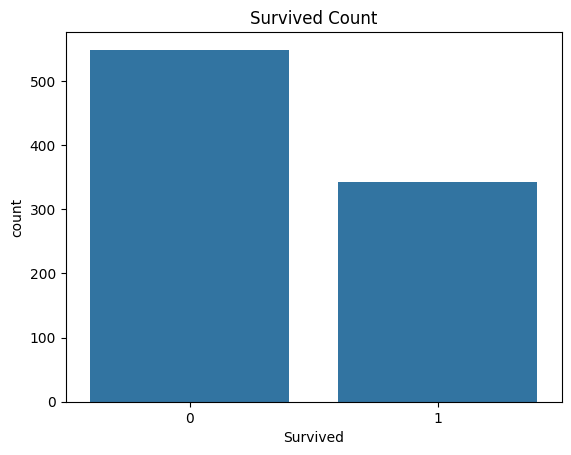

In [ ]:
sns.countplot(x='Survived',data=df)
plt.title('Survived Count')


Text(0.5, 1.0, 'Age Distribution')

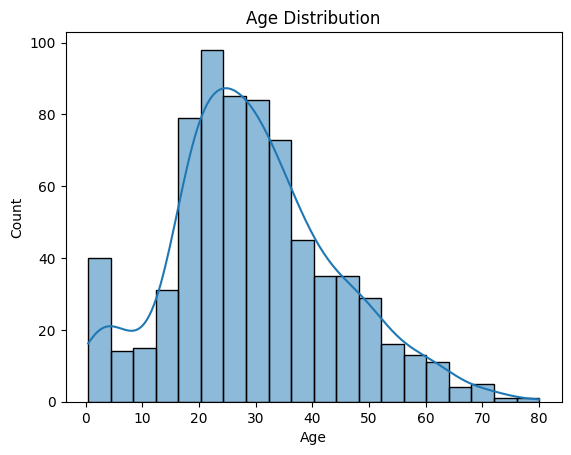

In [ ]:
sns.histplot(df['Age'],kde=True)
plt.title('Age Distribution')

Text(0.5, 1.0, 'Pclass v/s Age')

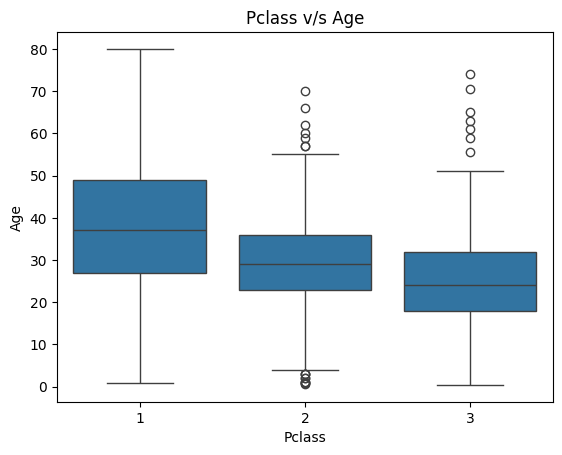

In [ ]:
sns.boxplot(x='Pclass',y='Age',data=df)
plt.title('Pclass v/s Age')

Text(0.5, 1.0, 'Pclass v/s Age')

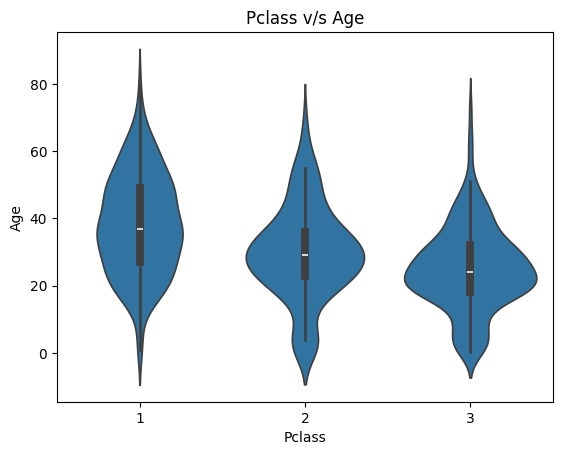

In [ ]:
sns.violinplot(x='Pclass',y='Age',data=df)
plt.title('Pclass v/s Age')

Text(0.5, 1.0, 'Survived Count v/s Sex')

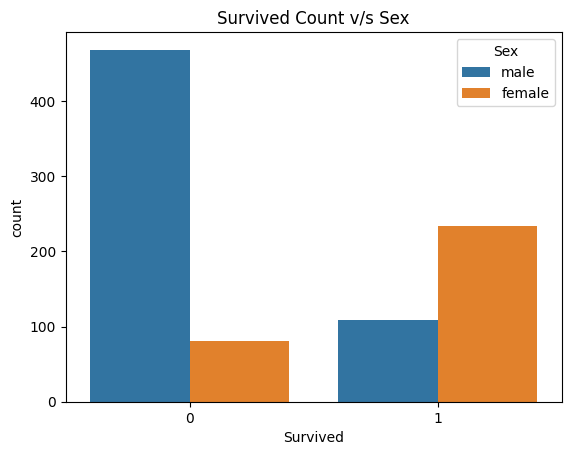

In [ ]:
sns.countplot(x='Survived',hue='Sex',data=df)
plt.title('Survived Count v/s Sex')

In [ ]:
# handling missing value
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Age'].fillna(df['Age'].mean(),inplace = True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
df.drop(['Cabin' , 'Name' , 'Ticket' , 'PassengerId'] , axis = 1,inplace=True)


/tmp/ipython-input-17-4209186693.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace = True)
/tmp/ipython-input-17-4209186693.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [ ]:
# ************************************Feature Scaling****************************
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
df[['Age' , 'Fare']] = scaler.fit_transform(df[['Age' , 'Fare']])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Survived',axis=1)
y=df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#******************************cross-validation and hyperparameter****************
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score

In [ ]:
dt_params = {'max_depth':[3,5,10],'min_samples_split' : [2,5,10]}
gs = GridSearchCV(DecisionTreeClassifier(),dt_params,cv=5)
gs.fit(X_train,y_train)
gs.best_params_

{'max_depth': 3, 'min_samples_split': 2}

In [ ]:
cv_scores = cross_val_score(gs.best_estimator_,X,y,cv=5)
cv_scores

array([0.81564246, 0.81460674, 0.81460674, 0.78089888, 0.82022472])

In [ ]:
np.mean(cv_scores)

np.float64(0.8091959073504487)

In [ ]:
# ***********************RandomForest*********************
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8156424581005587

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100,random_state=42)
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
accuracy_score(y_test,y_pred)

0.8100558659217877

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100,random_state=42)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7988826815642458

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(random_state =42,verbose=0)
cat.fit(X_train,y_train)
y_pred = cat.predict(X_test)
accuracy_score(y_test,y_pred)

0.8268156424581006

In [ ]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=42)
lgb.fit(X_train,y_train)
y_pred = lgb.predict(X_test)
accuracy_score(y_test,y_pred)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000460 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


0.8212290502793296

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)
accuracy_score(y_test,y_pred)

0.7988826815642458

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8100558659217877

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[88, 17],
       [17, 57]])

In [ ]:
# comparing all the models
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.77      0.77      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [ ]:
from sklearn.metrics import f1_score , classification_report , roc_auc_score , roc_curve



model RandomForestClassifier
accuracy 0.8156424581005587
f1 score 0.7659574468085106
classification report               precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179

confusion matrix [[92 13]
 [20 54]]
model GradientBoostingClassifier
accuracy 0.8100558659217877
f1 score 0.7536231884057971
classification report               precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

confusion matrix [[93 12]
 [22 52]]
model XGBClassifier
accuracy 0.7988826815642458
f1 score

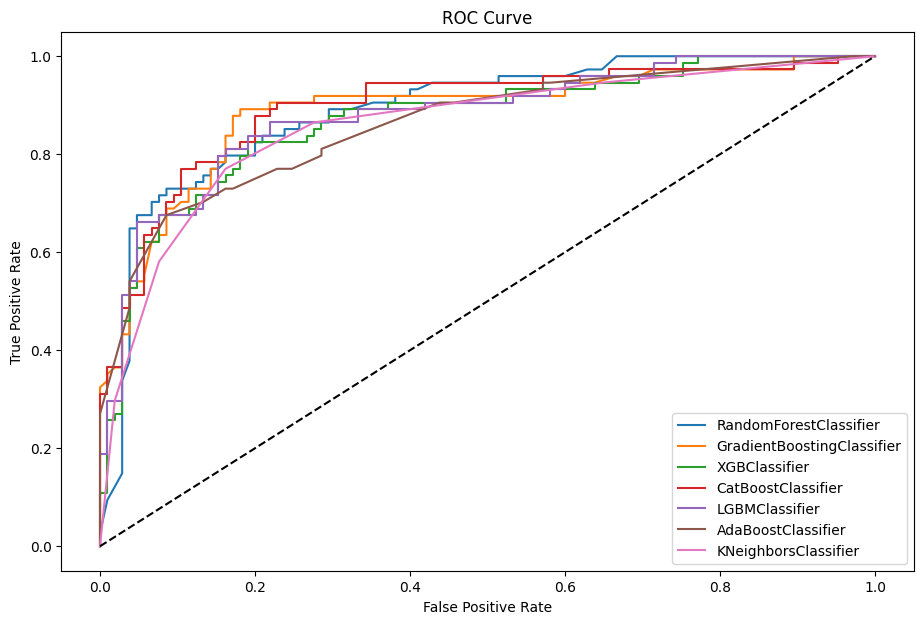

In [ ]:
def evaluate(model):
  y_pred = model.predict(X_test)
  print('model',type(model).__name__)
  print('accuracy',accuracy_score(y_test,y_pred))
  print('f1 score',f1_score(y_test,y_pred))
  print('classification report' , classification_report(y_test,y_pred))
  print('confusion matrix' , confusion_matrix(y_test,y_pred))
  if hasattr(model,'predict_proba'):
    fpr,tpr,k = roc_curve(y_test,model.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr,label=type(model).__name__)

plt.figure(figsize=(11,7))
for model in [rf,gb,xgb,cat,lgb,ada,knn]:
  evaluate(model)

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()